# The youth\`s interests, habits, fears & etc - exploratory data analysis with PCA

## Introduction

There are about 150 columns in the dataset. First of all I wanted to reduce the dimension and analys the data then. I used a principal component analysis for this purpose.

Let’s load the required packages and datasets.

In [29]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
%pylab inline
sns.set_context('poster', rc = {'figure.figsize': [15,9]})

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [30]:
os.chdir("../data/")
df = pd.read_csv("responses.csv", sep=',')
df = df.dropna()
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,20.0,186.0,77.0,1.0,male,right handed,secondary school,no,city,block of flats


## DATA preparation

In [31]:
df.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('O')], dtype=object)

There are some object and python type colums in the data. They aren’t not supported by PCA procedure. Let’s transform them into integer and normalize.

In [32]:
for col in df.select_dtypes(include=['O', 'object']).columns:
    df[col] = df[col].astype('category')
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

df_sd = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns) # Normalization

In [33]:
df_sd.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,0.399471,-0.371273,-0.914900,-1.128973,-0.110254,-0.790021,-1.374236,1.329497,1.052115,-0.970806,...,-0.129312,-1.100457,-1.304337,-0.302075,-0.822567,0.321107,-1.854850,-0.54649,1.607827,-0.794960
1,-1.283301,0.886205,-0.914900,-1.128973,-1.050900,-1.594363,-0.593262,-0.387133,1.052115,1.179216,...,-0.495513,-1.100457,-0.584394,0.705837,-0.822567,0.321107,-1.854850,-0.54649,-0.621958,-0.794960
2,0.399471,2.143683,-0.914900,-0.235865,0.830393,0.818662,1.749660,-0.387133,1.052115,0.462542,...,-0.129312,0.272490,0.063556,0.705837,-0.822567,0.321107,0.649495,-0.54649,-0.621958,-0.794960
3,0.399471,-0.371273,0.781503,0.657243,-0.110254,0.818662,0.187712,1.329497,-0.683810,-0.970806,...,-0.129312,-0.361178,-0.512399,-0.302075,-0.822567,0.321107,0.649495,-0.54649,1.607827,1.257925
4,0.399471,-0.371273,-0.914900,0.657243,-0.110254,0.014321,0.187712,-1.245449,1.052115,1.895889,...,-0.129312,1.328602,0.783500,-0.302075,1.215706,0.321107,0.649495,-0.54649,-0.621958,-0.794960


## Principal component analysis 

In [34]:
Y = []
for i in list(range(1, len(df_sd.columns)+1)):
    Y.append(PCA(n_components=i).fit(df_sd).explained_variance_ratio_.sum())
Y = [x*100 for x in Y] 
Y = pd.DataFrame({'Y':Y, 'X':list(range(1, len(Y)+1))})
Y[0:10]

,X,Y
0,1,6.635732
1,2,11.744228
2,3,16.360101
3,4,19.302644
4,5,22.090791
5,6,24.362056
6,7,26.362777
7,8,28.205751
8,9,29.881037
9,10,31.435141


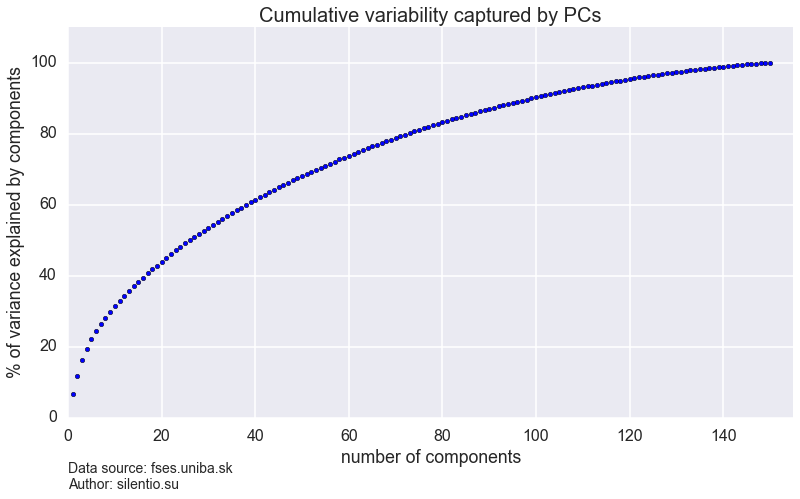

In [35]:
plt.figure(figsize=(13,7))
x_values = Y.X 
y_values = Y.Y
title = ('Cumulative variability captured by PCs')
plt.title(title, fontsize=20)
plt.ylabel('% of variance explained by components')
plt.xlabel('number of components')
plt.xlim(0, 155)
plt.ylim(0, 110)
plt.scatter(x_values, y_values)
plt.text(0, -20,
         'Data source: fses.uniba.sk'
        '\nAuthor: silentio.su',
          fontsize=14)

We have too many componets. I took only 4 ones, that explained 20% of variance. Thats'not enough for a comprehensive analysis, but I look forward to some insights.

In [36]:
pca = PCA(n_components=4)
df_pca = pca.fit(df_sd).components_

In [37]:
df_pca = pd.DataFrame(df_pca.T, columns=['PC-1', 'PC-2', 'PC-3', 'PC-4'],
                      index=df_sd.columns)

In [38]:
df_pca.sort_values(by = ['PC-1'], ascending=False)[0:10]

,PC-1,PC-2,PC-3,PC-4
Gender,0.247704,0.053786,-0.018344,-0.043663
Height,0.203211,0.036686,-0.009257,-0.021013
Weight,0.186879,0.050890,-0.018891,-0.012336
PC,0.149901,0.077540,-0.001848,-0.035110
Cars,0.141028,0.075775,0.114236,-0.057301
Action,0.135743,0.056988,0.051334,-0.011848
War,0.122697,0.086244,-0.009132,0.063606
Small - big dogs,0.118734,0.029338,0.005951,0.083742
Western,0.113931,0.115364,-0.043476,0.005377
Sci-fi,0.110516,0.076705,-0.047432,0.033817


## Observations

### Height and Weight are determined by Gender, but not by Age

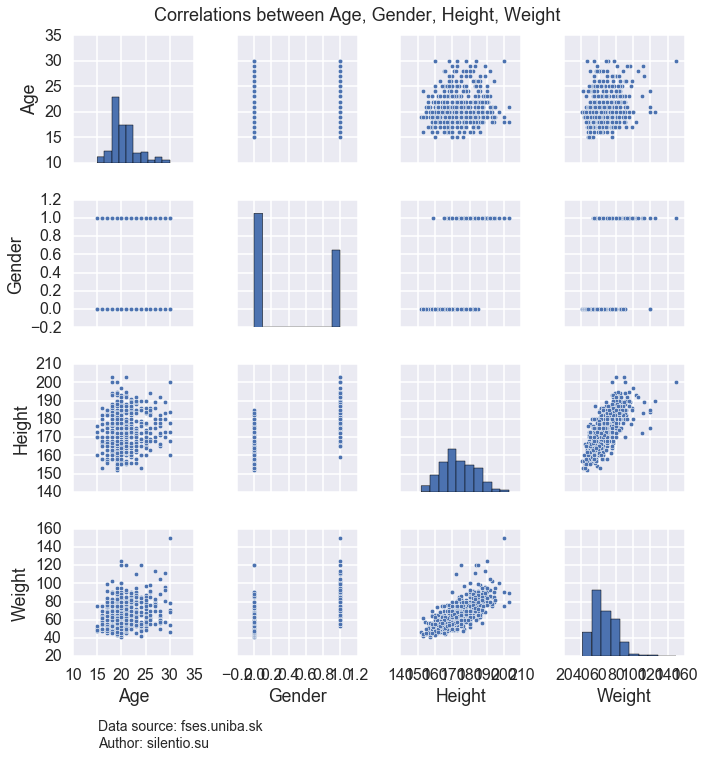

In [39]:
sns.pairplot(df[['Age', 'Gender', 'Height', 'Weight']]).fig.suptitle('Correlations between Age, Gender, Height, Weight', 
                                                                     fontsize=18, y=1)
plt.text(-520, 0,
         'Data source: fses.uniba.sk'
        '\nAuthor: silentio.su',
          fontsize=14)

### Men and women have different interests, phobias, habits...

Women listen to musicals, latino, watch romantic movies, tales, like reading, writing notes (a daily pursuits list), art exhibitions, dancing, shopping, a theatre, afraid thunders, lightning, darkness, spiders, snakes, rats, dangerous dogs, crying when feeling down, belive in God, are interested in children more, than men, they are more emphatetic persons, than men.

Men listen to metal, hardrock, watch horror, sci-fi, war, action, movies, thrillers, westerns, are interested in physics, PC, cars, science and technology, adrenaline sports, like big dogs, spend a lot of money on entertainments and gadgets.

Сut a long story short, stereotypes get a crushing victory.

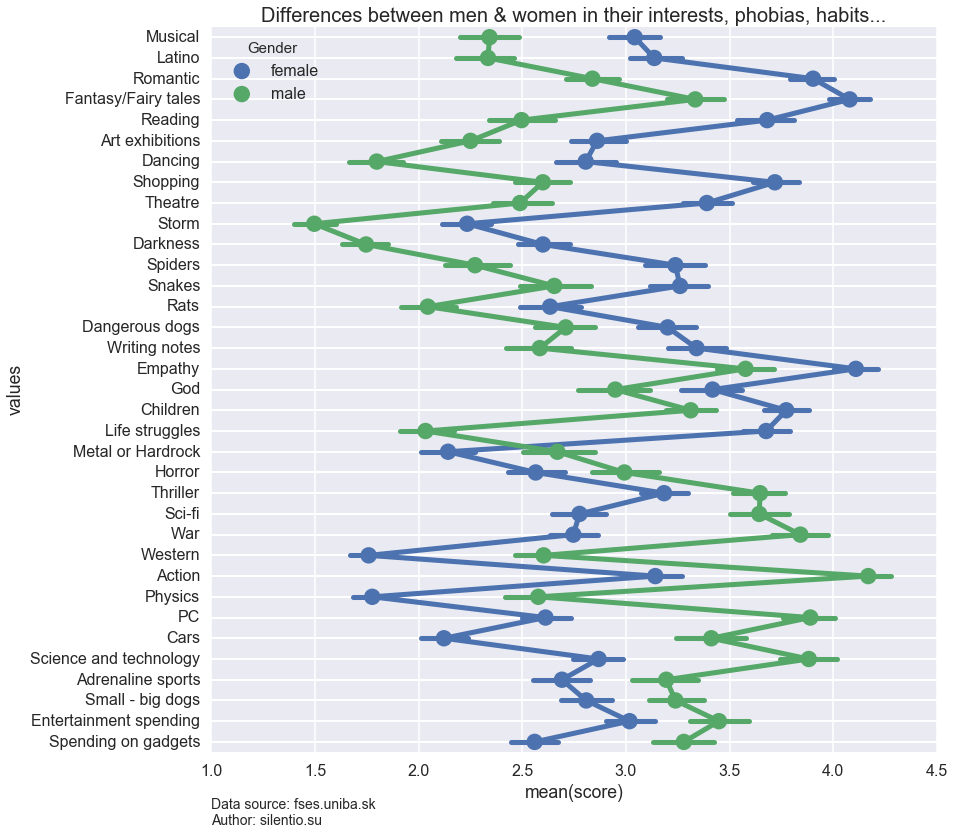

In [40]:
df = pd.read_csv("responses.csv", sep=',')
df = df.dropna()

df_fm = df[['Musical', 'Latino', 'Romantic', 'Fantasy/Fairy tales', 'Reading',
       'Art exhibitions', 'Dancing', 'Shopping', 'Theatre', 'Storm',
       'Darkness', 'Spiders', 'Snakes', 'Rats', 'Dangerous dogs',
       'Writing notes', 'Empathy', 'God', 'Children', 'Life struggles', 
               'Metal or Hardrock', 'Horror', 'Thriller', 'Sci-fi', 'War', 'Western',
       'Action', 'Physics', 'PC', 'Cars', 'Science and technology',
       'Adrenaline sports', 'Small - big dogs', 'Entertainment spending',
       'Spending on gadgets', 'Gender']]
df_fm = pd.melt(df_fm, id_vars = ['Gender'], var_name='values', value_name='score')

plt.figure(figsize=(13, 13))
title = ('Differences between men & women in their interests, phobias, habits...')
plt.title(title, fontsize=20)
sns.pointplot(y='values', x='score', hue='Gender', data=df_fm, estimator=mean)
plt.grid(axis='y',color='white', lw=2)
plt.text(1, 38,
         'Data source: fses.uniba.sk'
        '\nAuthor: silentio.su',
          fontsize=14)

### Women spent most of their childhood in a village belive in God more, than urban children do. There is no such dependence for men

Results of Student's t-test:

In [28]:
stats.ttest_ind(df['God'][df.Gender=='female'], df['God'][df.Gender=='male']),\
stats.ttest_ind(df['God'][df['Village - town']=='city'], df['God'][df['Village - town']=='village']),\
stats.ttest_ind(df['God'][(df.Gender=='female') & (df['Village - town']=='village')], 
                df['God'][(df.Gender=='female') & (df['Village - town']=='city')]),\
stats.ttest_ind(df['God'][(df.Gender=='male') & (df['Village - town']=='village')], 
                df['God'][(df.Gender=='male') & (df['Village - town']=='city')])

(Ttest_indResult(statistic=4.071298590900323, pvalue=5.2318446725837403e-05),
 Ttest_indResult(statistic=-3.3230336359953867, pvalue=0.00093873193047212334),
 Ttest_indResult(statistic=3.3527316022392917, pvalue=0.00087643653498416338),
 Ttest_indResult(statistic=1.3535218017510833, pvalue=0.17702100415226218))

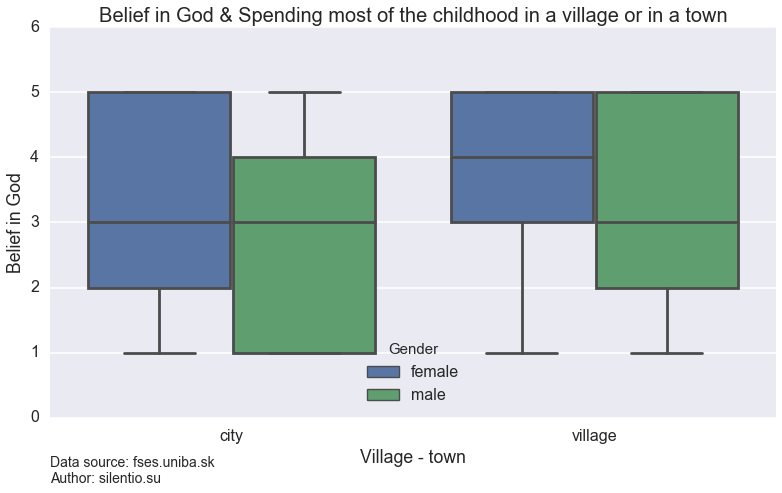

In [202]:
plt.figure(figsize=(13, 7))
title = ('Belief in God & Spending most of the childhood in a village or in a town')
plt.title(title, fontsize=20)
sns.boxplot(y=df.God, x=df['Village - town'], hue=df.Gender)
plt.ylabel('Belief in God')
plt.ylim(0, 6)
plt.text(-0.5, -1,
         'Data source: fses.uniba.sk'
        '\nAuthor: silentio.su',
          fontsize=14)


### There is a weak positive correlation between Age and interest in Politics

Results of Pearson's correlation test:

In [257]:
stats.pearsonr(df['Age'], df['Elections']), stats.pearsonr(df['Age'], df['Politics'])

((0.23141477873169253, 1.2060491757492976e-09),
 (0.12169695278175816, 0.0015489945759788746))

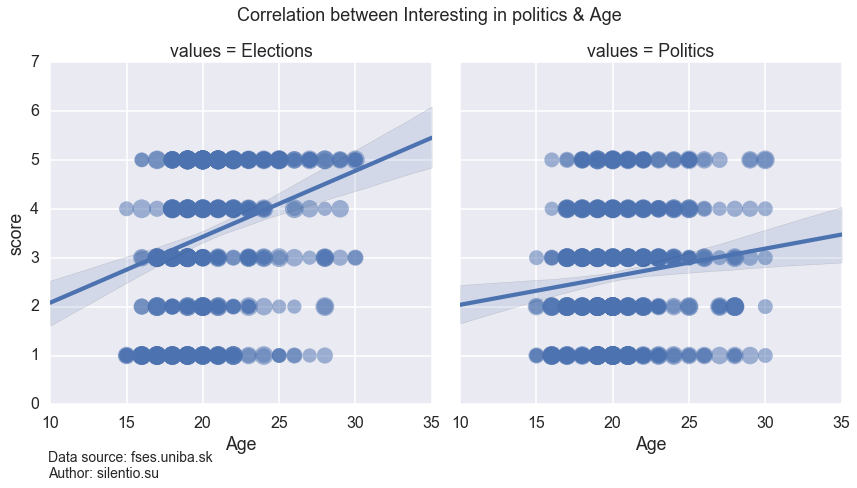

In [146]:
df_plt = df[['Elections', 'Age', 'Politics']]
df_plt = pd.melt(df_plt, id_vars = ['Age'], var_name='values', value_name='score')

sns.lmplot(data=df_plt, col='values', x='Age', y='score', scatter_kws={"s": df_plt.score.value_counts(),"alpha":.5},
          size=6).fig.suptitle('Correlation between Interesting in politics & Age', fontsize=18, y=1.06)
plt.text(-17, -1.5,
         'Data source: fses.uniba.sk'
        '\nAuthor: silentio.su',
          fontsize=14)

### Some "social personality types" are described by PCA-method

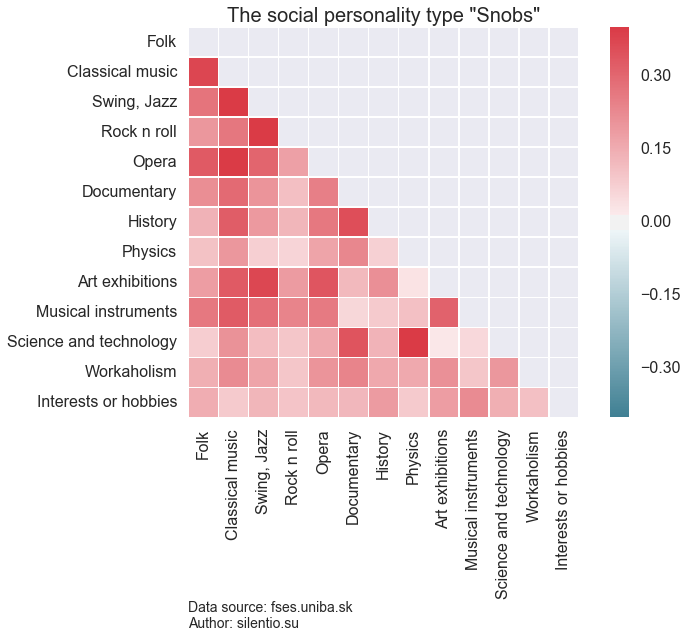

In [259]:
df_ps2 = df[['Folk', 'Classical music', 'Swing, Jazz', 'Rock n roll', 'Opera',
       'Documentary', 'History', 'Physics', 'Art exhibitions',
       'Musical instruments', 'Science and technology', 'Workaholism',
       'Interests or hobbies']]

corr = df_ps2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 7))
title = ('The social personality type \"Snobs\"')
plt.title(title, fontsize=20)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, linewidths=.5, vmin=-.3, vmax=.4, square=True, ax=ax)
plt.text(-0, -7,
         'Data source: fses.uniba.sk'
        '\nAuthor: silentio.su',
          fontsize=14)

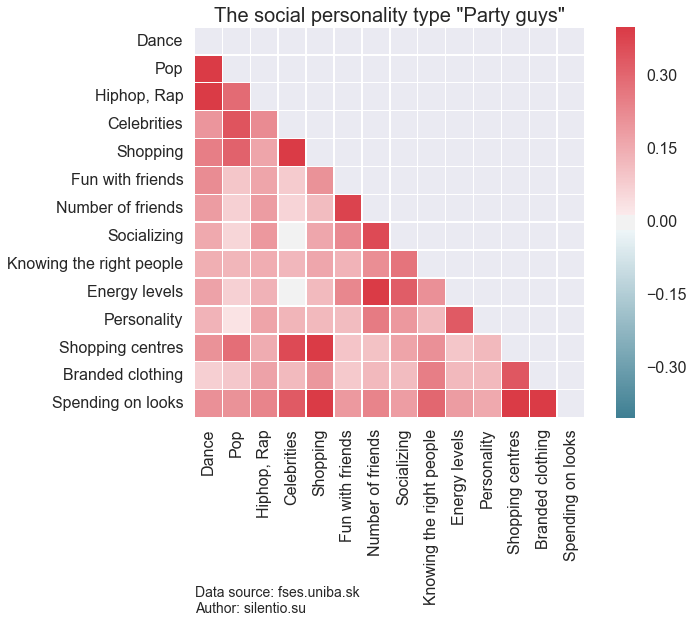

In [218]:
df_ps3 = df[['Dance', 'Pop', 'Hiphop, Rap', 'Celebrities', 'Shopping',
       'Fun with friends', 'Number of friends', 'Socializing',
       'Knowing the right people', 'Energy levels', 'Personality',
       'Shopping centres', 'Branded clothing', 'Spending on looks']]

corr = df_ps3.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 7))
title = ('The social personality type \"Party guys\"')
plt.title(title, fontsize=20)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, linewidths=.5, vmin=-.3, vmax=.4, square=True, ax=ax)
plt.text(-0, -7,
         'Data source: fses.uniba.sk'
        '\nAuthor: silentio.su',
          fontsize=14)

## Сonclusion

PCA is not the most suitable method in this case, but in my opinion it's very effective for exploratory data analysis.